In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [9]:
csv_path = '../Data/'

df = pd.read_csv('../Pré-Processamento/pp_market.csv')
port1 = pd.read_csv(f'{csv_path}estaticos_portfolio1.csv', index_col='Unnamed: 0')
port2 = pd.read_csv(f'{csv_path}estaticos_portfolio2.csv', index_col='Unnamed: 0')
port3 = pd.read_csv(f'{csv_path}estaticos_portfolio3.csv', index_col='Unnamed: 0')

ids = df['id']
df.drop('id',1,inplace=True)

In [10]:

scaler = MaxAbsScaler()

df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#df.drop('Unnamed: 0',1,inplace=True)
df.index = ids

In [11]:
df.head()

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_meso_regiao_OESTE POTIGUAR,nm_meso_regiao_OUTROS,nm_meso_regiao_SUDESTE PIAUIENSE,nm_meso_regiao_SUDOESTE AMAZONENSE,nm_meso_regiao_SUDOESTE PIAUIENSE,nm_meso_regiao_SUL AMAZONENSE,nm_meso_regiao_SUL MARANHENSE,nm_meso_regiao_VALE DO ACRE,nm_meso_regiao_VALE DO JURUA,fl_passivel_iss_True
id,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1.0,0.135837,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1.0,0.013746,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1.0,0.066644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1.0,0.061187,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1.0,0.030066,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
df.shape

(460369, 117)

## NMF

In [13]:
nmf = NMF(15)

nmf_features = nmf.fit_transform(df)

norm_features = normalize(nmf_features)
df_nmf = pd.DataFrame(norm_features, index=ids)

In [14]:
nlargest = 1000

port_train = port1['id']
teste = df_nmf.loc[port_train.values].T
similarities = df_nmf.dot(teste)
similarities = similarities.mean(axis=1)
similarities1 = similarities.nlargest(nlargest)

port_train = port2['id']
teste = df_nmf.loc[port_train.values].T
similarities = df_nmf.dot(teste)
similarities = similarities.mean(axis=1)
similarities2 = similarities.nlargest(nlargest)

port_train = port3['id']
teste = df_nmf.loc[port_train.values].T
similarities = df_nmf.dot(teste)
similarities = similarities.mean(axis=1)
similarities3 = similarities.nlargest(nlargest)


In [15]:
scaler = MaxAbsScaler()
market=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [16]:
sim1 = df.loc[similarities1.index]
sim2 = df.loc[similarities2.index]
sim3 = df.loc[similarities3.index]

sim1['port'] = 1
sim2['port'] = 2
sim3['port'] = 3

df2 = sim1.append([sim2,sim3])

In [17]:
port = df2.port

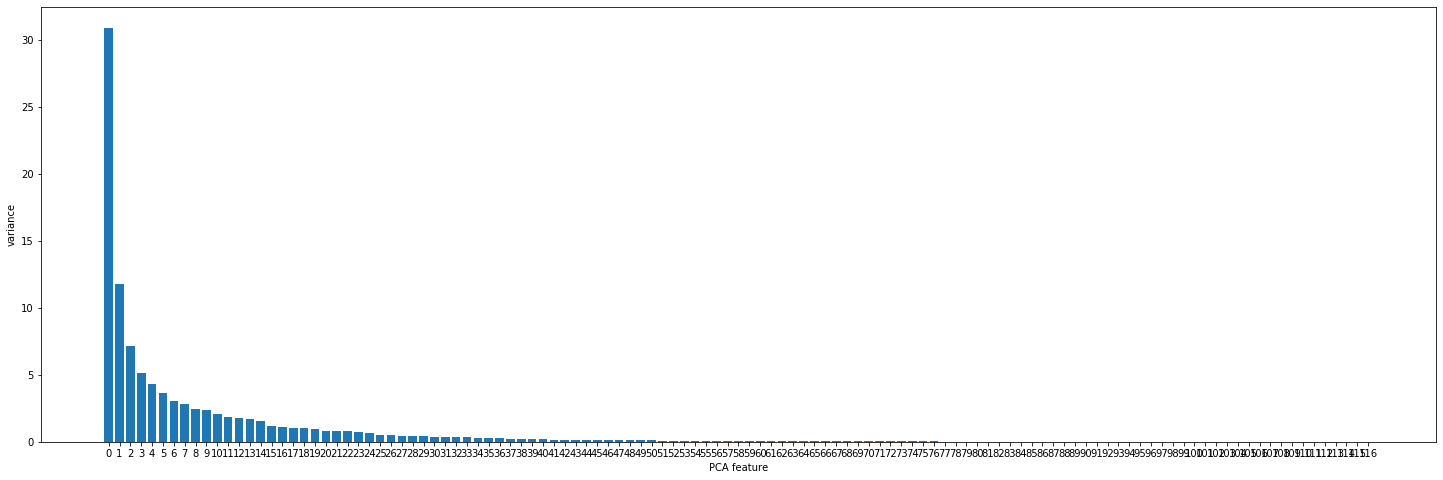

In [18]:
pca = PCA()
pca.fit(df2.drop('port',1))

plt.figure(figsize=(25,8))
features = range(pca.n_components_)
plt.bar(features, 100*pca.explained_variance_/pca.explained_variance_.sum())
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [19]:
pca.explained_variance_[:3].sum()/pca.explained_variance_.sum()

0.4980942551236182

In [20]:
df3 = pd.DataFrame(pca.transform(df2.drop('port',1)))
df3['port'] = port.values

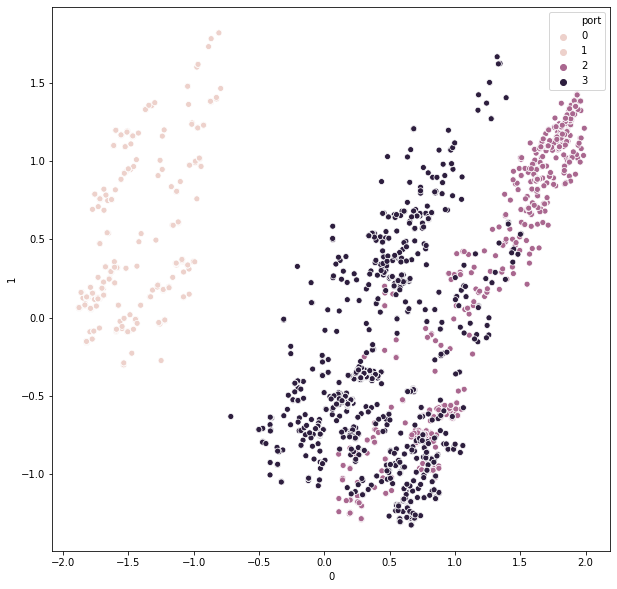

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df3,x=0,y=1, hue='port')
plt.show()

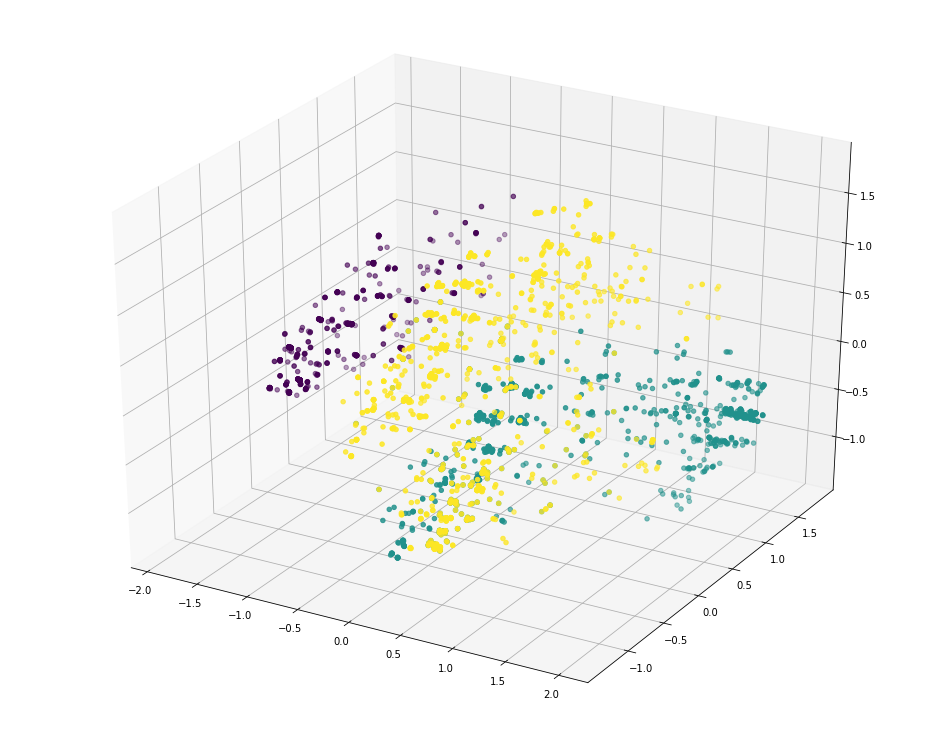

In [29]:
fig = plt.figure(figsize=(13,10))
ax = Axes3D(fig)

ax.scatter(df3[0], df3[1], df3[2], c=df3['port'])
plt.show()